In [22]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [23]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
data=pd.read_csv("iris.csv");
Iris=pd.DataFrame(data);
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
Iris.shape

(150, 5)

In [25]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
df1=Iris[Iris['species']=='versicolor']
df2=Iris[Iris['species']=='setosa']
frames = [df1, df2]
Iris = pd.concat(frames)
Iris.shape

(100, 5)

In [26]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris["species"].replace({"setosa": 0 , "versicolor": 1}, inplace=True)

In [27]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


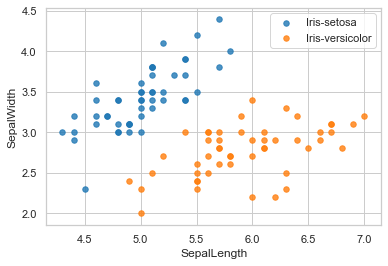

In [28]:
#visualization of given dataset
#codesegment4------------------
df=pd.DataFrame(Iris,columns=['sepal_width','sepal_length','species'])
df1=df[df['species']==0]
df2=df[df['species']==1]

fig,ax = plt.subplots()
ax.scatter(df1['sepal_length'], df1['sepal_width'], c='tab:blue', label='Iris-setosa',alpha=0.8,s=30)
ax.scatter(df2['sepal_length'], df2['sepal_width'], c='tab:orange', label='Iris-versicolor',alpha=0.8,s=30)
ax.legend(loc='best')
ax.grid('True')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()



In [29]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [30]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.random.set_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
train_index=Iris.sample(frac=0.8,replace=False,random_state=5).index
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [31]:
train_X = np.array( X[train_index])
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [32]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
    min_max_scaler = preprocessing.MinMaxScaler()
    data= min_max_scaler.fit_transform(data)
    print(data)

In [33]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
tf.compat.v1.disable_eager_execution()
W = tf.Variable(tf.random.normal(shape=[4, 1])) #weights
B = tf.Variable(tf.random.normal(shape=[1, 1])) #bias
init=tf.compat.v1.global_variables_initializer()
#line10
sess = tf.compat.v1.Session()
sess.run(init)

In [34]:
# Define placeholders
#tf.compat.v1.disable_eager_execution()
data = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

In [14]:
a=tf.compat.v1.placeholder(tf.float32, shape=[None,4])
b=tf.compat.v1.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random.normal(shape=[4,1]))
mult=tf.matmul(a,w)
init=tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    mult_result=sess.run(mult, feed_dict={a:train_X})
#print(mult_result)

In [35]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod=tf.add(tf.matmul(data,W),B)

In [36]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [37]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
learning_rate=0.001
#batch_size---- #using batch makes the training ------?
batch_size=80
#line13--------------------------------
iter_num=1502

In [38]:
# Define the optimizer with name opt
opt=tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [39]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [40]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [41]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_index=np.random.choice(range(len(train_X)),30,replace=False)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc=sess.run(accuracy,{data: batch_train_X, target: batch_train_y})
    
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
#Write the command to calculate test accuracy:
#line18-------------------------------
test_y=test_y.reshape(20,1)
temp_test_acc = sess.run(accuracy,{data: test_X, target: test_y})
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 4.510105 train_acc: 0.500000
epoch:  200 loss: 3.493109 train_acc: 0.500000
epoch:  300 loss: 2.611358 train_acc: 0.466667
epoch:  400 loss: 1.574207 train_acc: 0.466667
epoch:  500 loss: 0.917165 train_acc: 0.400000
epoch:  600 loss: 0.449848 train_acc: 0.666667
epoch:  700 loss: 0.420893 train_acc: 1.000000
epoch:  800 loss: 0.388513 train_acc: 1.000000
epoch:  900 loss: 0.374507 train_acc: 1.000000
epoch: 1000 loss: 0.363372 train_acc: 1.000000
epoch: 1100 loss: 0.367379 train_acc: 0.966667
epoch: 1200 loss: 0.342283 train_acc: 1.000000
epoch: 1300 loss: 0.314942 train_acc: 1.000000
epoch: 1400 loss: 0.340420 train_acc: 1.000000
epoch: 1500 loss: 0.312531 train_acc: 1.000000
The test accuracy is: 1.000000


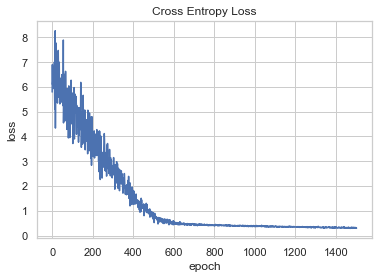

In [42]:
# Visualization of the results
# loss function
epoch=range(len(loss_trace))
plt.plot(epoch,loss_trace)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

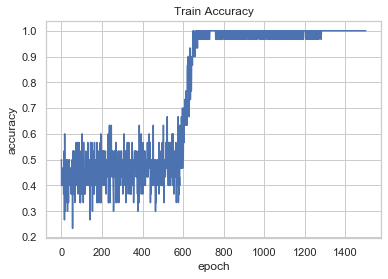

In [43]:
# plot for training accuracy
#codesegment20---------------------------
epoch=range(len(train_acc))
plt.plot(epoch,train_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train Accuracy')
plt.show()